In [149]:
import numpy as np
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns


In [150]:
mnist = fetch_openml('mnist_784')

/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [254]:
X = mnist.data
y = mnist.target
# print(y)
y = (y.astype(int)==2).astype(int)
# print(y)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (59500, 784)
X_test.shape: (10500, 784)
y_train.shape: (59500,)
y_test.shape: (10500,)


In [256]:
X_pool,X_train,y_pool,y_train = train_test_split(X_train, y_train, test_size=0.0035, random_state=42)
print("X_train.shape:", X_train.shape)
print("X_pool.shape:", X_pool.shape)


X_train.shape: (209, 784)
X_pool.shape: (59291, 784)


In [257]:
def evaluate_and_plot(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='binary')

    # Plot the confusion matrix
    plt.figure(figsize=(3, 2))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not 2", "Digit 2"],
                yticklabels=["Not 2", "Digit 2"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    # print("Confusion Matrix:")
    # print(conf_matrix)
    # print("\nClassification Report:")
    # print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")


In [258]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)


RandomForestClassifier()

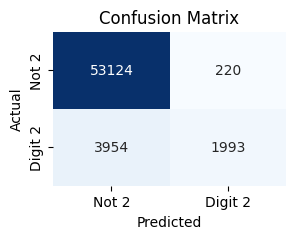

Accuracy: 0.9296014572194768
Precision: 0.9005874378671487
Recall: 0.33512695476710946
F1 Score: 0.4884803921568627


In [259]:
# Predictions on pool data
y_pool_pred = clf.predict(X_pool)

evaluate_and_plot(y_pool, y_pool_pred)


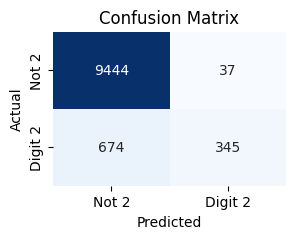

Accuracy: 0.9322857142857143
Precision: 0.9031413612565445
Recall: 0.338567222767419
F1 Score: 0.4925053533190578


In [260]:
y_test_pred = clf.predict(X_test)
evaluate_and_plot(y_test, y_test_pred)

#### Step 2: Identify the true positive samples from pool data


In [261]:
true_positives_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_pool, y_pool_pred)) if true_label == 1 and pred_label == 1]
print("True positives indices:", true_positives_indices)
X_pool_true_positives = X_pool.iloc[true_positives_indices]
y_pool_true_positives = y_pool.iloc[true_positives_indices]

True positives indices: [98, 156, 178, 253, 260, 297, 298, 337, 367, 393, 414, 452, 455, 487, 500, 537, 599, 641, 647, 674, 680, 682, 686, 710, 761, 769, 831, 841, 863, 886, 894, 901, 910, 944, 957, 963, 1021, 1044, 1053, 1056, 1140, 1154, 1253, 1276, 1300, 1418, 1424, 1461, 1485, 1499, 1502, 1518, 1557, 1593, 1625, 1665, 1681, 1727, 1744, 1757, 1785, 1843, 1967, 1968, 1979, 2044, 2052, 2081, 2082, 2130, 2163, 2191, 2212, 2228, 2232, 2251, 2278, 2285, 2286, 2295, 2306, 2330, 2345, 2398, 2447, 2490, 2549, 2563, 2581, 2664, 2678, 2703, 2737, 2772, 2872, 2885, 2889, 2895, 2917, 2931, 2941, 2949, 2970, 2977, 2980, 2983, 3002, 3021, 3081, 3082, 3139, 3145, 3195, 3205, 3252, 3270, 3271, 3302, 3322, 3332, 3333, 3341, 3380, 3404, 3421, 3442, 3478, 3484, 3494, 3517, 3526, 3606, 3612, 3629, 3675, 3704, 3744, 3757, 3776, 3857, 3875, 3892, 3933, 4004, 4009, 4094, 4110, 4163, 4176, 4177, 4230, 4264, 4316, 4328, 4348, 4357, 4393, 4420, 4442, 4479, 4489, 4495, 4499, 4514, 4601, 4871, 4905, 5018, 5049

##### Step 3: Add true positive samples to training data


In [262]:
X_train = np.vstack([X_train, X_pool_true_positives])
y_train = np.hstack([y_train, y_pool_true_positives])
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (2202, 784)
y_train.shape: (2202,)


##### Step 4: Re-train your model with the expanded training data

In [263]:
clf.fit(X_train, y_train)

RandomForestClassifier()

/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


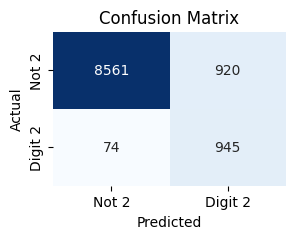

Accuracy: 0.9053333333333333
Precision: 0.5067024128686327
Recall: 0.9273797841020608
F1 Score: 0.6553398058252426


In [264]:
y_test_pred = clf.predict(X_test)
evaluate_and_plot(y_test, y_test_pred)

##### Step 5: reduce the pool data by removing the true positive samples

In [265]:
X_pool = np.delete(X_pool, true_positives_indices, axis=0)
y_pool = np.delete(y_pool, true_positives_indices, axis=0)
print("X_pool.shape:", X_pool.shape)
print("y_pool.shape:", y_pool.shape)


X_pool.shape: (57298, 784)
y_pool.shape: (57298,)


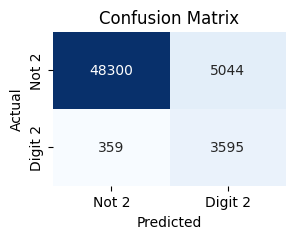

Accuracy: 0.905703514956892
Precision: 0.4161361268665355
Recall: 0.9092058674759737
F1 Score: 0.5709521162550624


In [266]:
y_pool_pred = clf.predict(X_pool)
evaluate_and_plot(y_pool, y_pool_pred)

##### same thing for iteration 2

In [267]:
true_positives_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_pool, y_pool_pred)) if true_label == 1 and pred_label == 1]
# print("True positives indices:", true_positives_indices)
#fetching the true positives from the pool
X_pool_true_positives = X_pool[true_positives_indices]
y_pool_true_positives = y_pool[true_positives_indices]

True positives indices: [9, 12, 22, 58, 76, 145, 165, 196, 211, 231, 232, 248, 263, 285, 296, 299, 305, 338, 345, 349, 357, 366, 374, 382, 387, 441, 445, 458, 459, 487, 495, 539, 563, 565, 575, 576, 587, 593, 615, 620, 623, 648, 698, 705, 721, 723, 741, 758, 788, 803, 805, 816, 820, 843, 893, 934, 969, 975, 984, 992, 1059, 1074, 1077, 1100, 1104, 1154, 1157, 1190, 1206, 1244, 1256, 1264, 1274, 1293, 1344, 1371, 1387, 1401, 1499, 1510, 1517, 1518, 1554, 1582, 1624, 1628, 1667, 1670, 1671, 1744, 1799, 1860, 1868, 1878, 1895, 1906, 1915, 1934, 1940, 1960, 1971, 1978, 1995, 2000, 2033, 2042, 2056, 2060, 2074, 2076, 2138, 2176, 2186, 2191, 2198, 2262, 2288, 2310, 2313, 2319, 2369, 2378, 2381, 2398, 2427, 2429, 2452, 2473, 2476, 2482, 2499, 2504, 2536, 2538, 2542, 2564, 2586, 2630, 2634, 2635, 2641, 2653, 2693, 2724, 2751, 2758, 2766, 2777, 2785, 2788, 2790, 2815, 2816, 2839, 2846, 2869, 2870, 2894, 2926, 2937, 2942, 2957, 2965, 2975, 2976, 2979, 2996, 3022, 3052, 3054, 3055, 3070, 3094, 314

X_train.shape: (5797, 784)
y_train.shape: (5797,)


/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


X_pool.shape: (53703, 784)
y_pool.shape: (53703,)


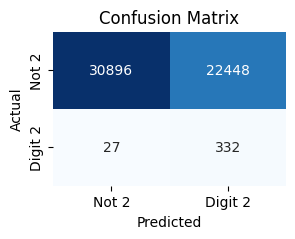

Accuracy: 0.581494516135039
Precision: 0.014574187884108867
Recall: 0.924791086350975
F1 Score: 0.02869614071481049


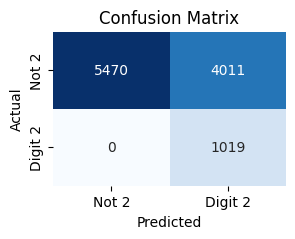

Accuracy: 0.618
Precision: 0.2025844930417495
Recall: 1.0
F1 Score: 0.33691519259381714


In [268]:
X_train = np.vstack([X_train, X_pool_true_positives])
y_train = np.hstack([y_train, y_pool_true_positives])
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
X_pool = np.delete(X_pool, true_positives_indices, axis=0)
y_pool = np.delete(y_pool, true_positives_indices, axis=0)
print("X_pool.shape:", X_pool.shape)
print("y_pool.shape:", y_pool.shape)
y_pool_pred = clf.predict(X_pool)

evaluate_and_plot(y_pool, y_pool_pred)
evaluate_and_plot(y_test, y_test_pred)



##### same thing for iteration 3    

In [269]:
true_positives_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_pool, y_pool_pred)) if true_label == 1 and pred_label == 1]
# print("True positives indices:", true_positives_indices)
#fetching the true positives from the pool
X_pool_true_positives = X_pool[true_positives_indices]
y_pool_true_positives = y_pool[true_positives_indices]

True positives indices: [91, 571, 612, 963, 1022, 1072, 1127, 1220, 1236, 1338, 1440, 1506, 1563, 1808, 1812, 1877, 1962, 2406, 2508, 2544, 2586, 2614, 2727, 2806, 2993, 3082, 3255, 3515, 3592, 3613, 3647, 4243, 4270, 4343, 4394, 4725, 4881, 5088, 5190, 5537, 5978, 6033, 6198, 6527, 6559, 6643, 6696, 6707, 6778, 6902, 6906, 7151, 7187, 7280, 7409, 7439, 7490, 7554, 7639, 7678, 7814, 7993, 8203, 8286, 8477, 8702, 9004, 9589, 10141, 10744, 10955, 11229, 11385, 12037, 12103, 12123, 12309, 12451, 12501, 12673, 12897, 13131, 13183, 13249, 13307, 13572, 13732, 13755, 14115, 14170, 14174, 14361, 14365, 14424, 14494, 14525, 14724, 14805, 14949, 15055, 15073, 15262, 15504, 15520, 15566, 15807, 15859, 15923, 16087, 16163, 16210, 16234, 16359, 16388, 16430, 16449, 16534, 17033, 17191, 17202, 17276, 17467, 17561, 17863, 17876, 18548, 18626, 18630, 18769, 19367, 19445, 20283, 20392, 20835, 20919, 21221, 21579, 21684, 21710, 21904, 21927, 21960, 22090, 22158, 22359, 22585, 22829, 22881, 22960, 22981

X_train.shape: (6129, 784)
y_train.shape: (6129,)


/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


X_pool.shape: (53371, 784)
y_pool.shape: (53371,)


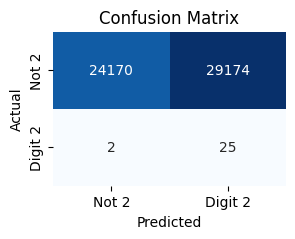

Accuracy: 0.4533360813925165
Precision: 0.0008561937052638789
Recall: 0.9259259259259259
F1 Score: 0.001710805447204544


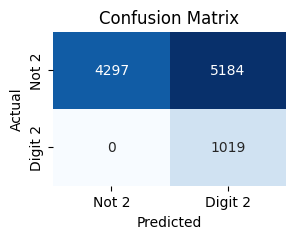

Accuracy: 0.5062857142857143
Precision: 0.16427535063678866
Recall: 1.0
F1 Score: 0.28219329825533096


In [270]:
X_train = np.vstack([X_train, X_pool_true_positives])
y_train = np.hstack([y_train, y_pool_true_positives])
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
X_pool = np.delete(X_pool, true_positives_indices, axis=0)
y_pool = np.delete(y_pool, true_positives_indices, axis=0)
print("X_pool.shape:", X_pool.shape)
print("y_pool.shape:", y_pool.shape)
y_pool_pred = clf.predict(X_pool)
evaluate_and_plot(y_pool, y_pool_pred)
evaluate_and_plot(y_test, y_test_pred)


##### same thing for iteration 4


In [271]:
true_positives_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_pool, y_pool_pred)) if true_label == 1 and pred_label == 1]
# print("True positives indices:", true_positives_indices)
#fetching the true positives from the pool
X_pool_true_positives = X_pool[true_positives_indices]
y_pool_true_positives = y_pool[true_positives_indices]

True positives indices: [588, 2537, 3217, 8162, 18837, 19154, 21411, 24332, 25575, 28686, 32126, 33642, 36498, 37700, 37796, 38302, 40389, 40815, 41416, 45348, 46230, 46939, 48475, 51171, 52796]


X_train.shape: (6154, 784)
y_train.shape: (6154,)


/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


X_pool.shape: (53346, 784)
y_pool.shape: (53346,)


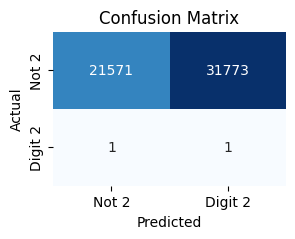

Accuracy: 0.4043789599970007
Precision: 3.1472272927550825e-05
Recall: 0.5
F1 Score: 6.294058408862034e-05


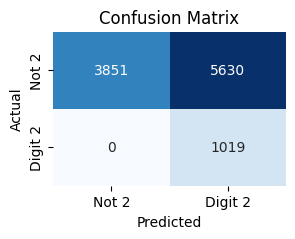

Accuracy: 0.4638095238095238
Precision: 0.1532561287411641
Recall: 1.0
F1 Score: 0.2657798643714137


In [272]:
X_train = np.vstack([X_train, X_pool_true_positives])
y_train = np.hstack([y_train, y_pool_true_positives])
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
X_pool = np.delete(X_pool, true_positives_indices, axis=0)
y_pool = np.delete(y_pool, true_positives_indices, axis=0)
print("X_pool.shape:", X_pool.shape)
print("y_pool.shape:", y_pool.shape)
y_pool_pred = clf.predict(X_pool)
evaluate_and_plot(y_pool, y_pool_pred)
evaluate_and_plot(y_test, y_test_pred)

##### itereation 5 

In [273]:
true_positives_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_pool, y_pool_pred)) if true_label == 1 and pred_label == 1]
print("True positives indices:", true_positives_indices)
#fetching the true positives from the pool
X_pool_true_positives = X_pool[true_positives_indices]
y_pool_true_positives = y_pool[true_positives_indices]

True positives indices: [42228]


X_train.shape: (6155, 784)
y_train.shape: (6155,)


/home/rishabh.mondal/miniconda3/envs/torch_env/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


X_pool.shape: (53345, 784)
y_pool.shape: (53345,)


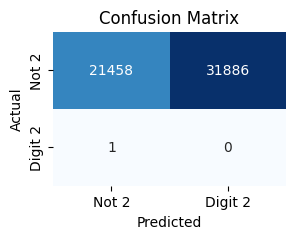

Accuracy: 0.40224950792014247
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


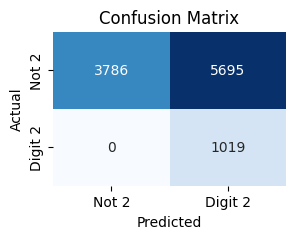

Accuracy: 0.4576190476190476
Precision: 0.15177241584748288
Recall: 1.0
F1 Score: 0.26354584249321095


In [274]:
X_train = np.vstack([X_train, X_pool_true_positives])
y_train = np.hstack([y_train, y_pool_true_positives])
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
X_pool = np.delete(X_pool, true_positives_indices, axis=0)
y_pool = np.delete(y_pool, true_positives_indices, axis=0)
print("X_pool.shape:", X_pool.shape)
print("y_pool.shape:", y_pool.shape)
y_pool_pred = clf.predict(X_pool)
evaluate_and_plot(y_pool, y_pool_pred)
evaluate_and_plot(y_test, y_test_pred)

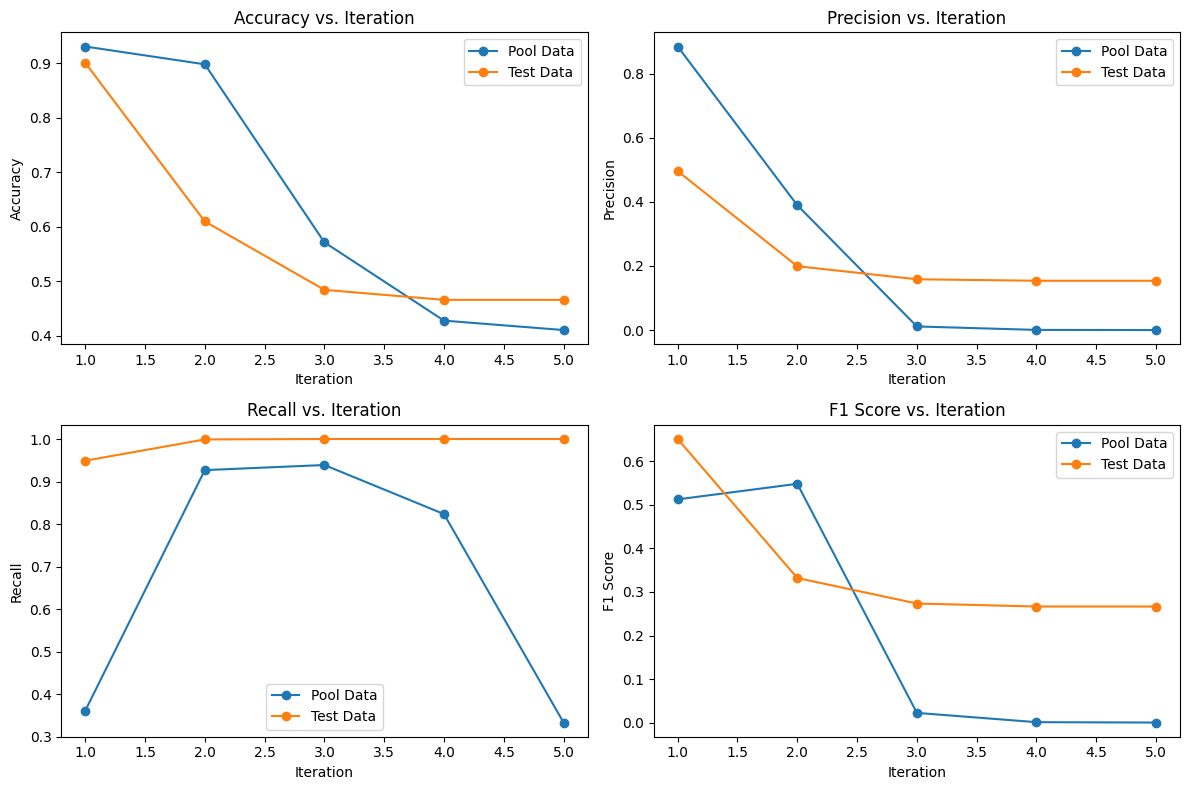

In [275]:
iterations = [1, 2, 3, 4, 5]
accuracy_pool = [0.9311868580391628, 0.8985195296094078, 0.5717429413300511, 0.42795299938157083, 0.41066976587249515]
precision_pool = [0.88463123197363, 0.38947252018135575, 0.01124612202688728, 0.0004584752423369138, 3.180863922641389e-05]
recall_pool = [0.3610223642172524, 0.9268421052631579, 0.9388489208633094, 0.8235294117647058, 0.3333333333333333]
f1_score_pool = [0.5127776450919513, 0.5484699836486802, 0.02222600698288342, 0.000916440284096488, 6.361120829490156e-05]

# Define the metrics for test data
accuracy_test = [0.9014285714285715, 0.6100952380952381, 0.48447619047619045, 0.4660952380952381, 0.4660952380952381]
precision_test = [0.4958974358974359, 0.19917824300528272, 0.1584266169154229, 0.15381132075471698, 0.15381132075471698]
recall_test = [0.9489695780176644, 0.9990186457311089, 1.0, 1.0, 1.0]
f1_score_test = [0.6513977770293027, 0.332137030995106, 0.2735203328412294, 0.2666143380429095, 0.2666143380429095]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(iterations, accuracy_pool, marker='o', linestyle='-', label='Pool Data')
plt.plot(iterations, accuracy_test, marker='o', linestyle='-', label='Test Data')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(iterations, precision_pool, marker='o', linestyle='-', label='Pool Data')
plt.plot(iterations, precision_test, marker='o', linestyle='-', label='Test Data')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Precision vs. Iteration')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(iterations, recall_pool, marker='o', linestyle='-', label='Pool Data')
plt.plot(iterations, recall_test, marker='o', linestyle='-', label='Test Data')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Recall vs. Iteration')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(iterations, f1_score_pool, marker='o', linestyle='-', label='Pool Data')
plt.plot(iterations, f1_score_test, marker='o', linestyle='-', label='Test Data')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Iteration')
plt.legend()

plt.tight_layout();



In [276]:
from tabulate import tabulate

# Define the data
data = {
    'Iteration': [1, 2, 3, 4, 5],
    'Accuracy (Pool Data)': accuracy_pool,
    'Precision (Pool Data)': precision_pool,
    'Recall (Pool Data)': recall_pool,
    'F1 Score (Pool Data)': f1_score_pool,
    'Accuracy (Test Data)': accuracy_test,
    'Precision (Test Data)': precision_test,
    'Recall (Test Data)': recall_test,
    'F1 Score (Test Data)': f1_score_test
}

# Create and print the table
table = tabulate(data, headers='keys', tablefmt='grid')
print(table)


+-------------+------------------------+-------------------------+----------------------+------------------------+------------------------+-------------------------+----------------------+------------------------+
|   Iteration |   Accuracy (Pool Data) |   Precision (Pool Data) |   Recall (Pool Data) |   F1 Score (Pool Data) |   Accuracy (Test Data) |   Precision (Test Data) |   Recall (Test Data) |   F1 Score (Test Data) |
+=============+========================+=========================+======================+========================+========================+=========================+======================+========================+
|           1 |               0.931187 |             0.884631    |             0.361022 |            0.512778    |               0.901429 |                0.495897 |             0.94897  |               0.651398 |
+-------------+------------------------+-------------------------+----------------------+------------------------+------------------------+-----